In [2]:
import tftables
import tables
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import time

from conv_vae import ConvolutionalVAE

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
network_architecture = {
    "input_size": 50000,
    "latent_representation_size": 40,
    "encoder_layer_sizes": [50000, 100, 100, 90, 90, 80, 80, 80],
    "decoder_layer_sizes": [40, 80, 80, 90, 90, 100, 100, 50000],
    "metals_predictor_layer_sizes": [40, 20, 20, 20, 10, 10, 10, 5, 2]
}
learning_rate = .0005
batch_size = 50

vae = ConvolutionalVAE(network_architecture, "data/sample_real_stars.h5",
                       learning_rate=learning_rate, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [3]:
vae.restore('output/output-191018-075923')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from output/output-191018-075923
loaded model weights from output/output-191018-075923


In [ ]:
h5file_real = tables.open_file('data/sample_real_stars.h5', 'r')
h5node_real = h5file.get_node('/spectra')

In [5]:
h5file_real = tables.open_file('data/sample_real_stars.h5', 'r')
h5node_real = h5file.get_node('/spectra')

In [4]:
h5node.cols

/spectra.cols (Cols), 8 columns
  MH_ratio (Column(8000,), float64)
  T_eff (Column(8000,), float64)
  abundances (Column(8000, 83), ('<f8', (83,)))
  alphaM_ratio (Column(8000,), float64)
  log_g (Column(8000,), float64)
  row_id (Column(8000,), int32)
  spectrum (Column(8000, 1569128), ('<f4', (1569128,)))
  wavelet (Column(8000, 2097152), ('<f4', (2097152,)))

In [30]:
data = [(x['MH_ratio'], x['alphaM_ratio']) for x in h5node.iterrows(step=20)]

In [33]:
np.std(MH_ratios)

1.0906162248930646

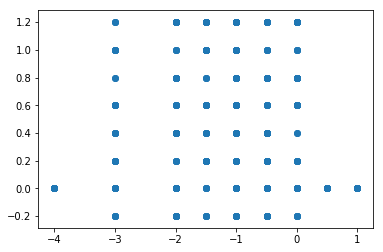

In [32]:
MH_ratios = np.array(data)[:, 0]
alphaM_ratios = np.array(data)[:, 1]
plt.scatter(MH_ratios, alphaM_ratios)

In [9]:
%time data = [(x['log_g'], x['T_eff']) for x in h5node.iterrows(step=20)]
log_gs = np.array(data)[:, 0]
T_effs = np.array(data)[:, 1]

CPU times: user 892 ms, sys: 368 ms, total: 1.26 s
Wall time: 1.26 s


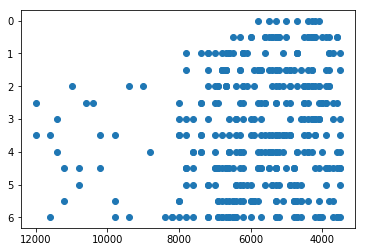

In [10]:
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.scatter(T_effs, log_gs)

In [11]:
squared_error = [np.mean(
    (vae.reconstruct(x['spectrum'][700000:750000]/np.max(x['spectrum'][700000:750000])) - 
    x['spectrum'][700000:750000]/np.max(x['spectrum'][700000:750000]))**2
)
for x in h5node.iterrows(step=20)]

In [23]:
tetra_error = [np.mean(
    (vae.reconstruct(x['spectrum'][700000:750000]/np.max(x['spectrum'][700000:750000])) - 
    x['spectrum'][700000:750000]/np.max(x['spectrum'][700000:750000]))**4
)
for x in h5node.iterrows(step=20)]

In [19]:
print(np.mean(squared_error), np.var(squared_error))

0.003188366763399917 4.298530215718672e-08


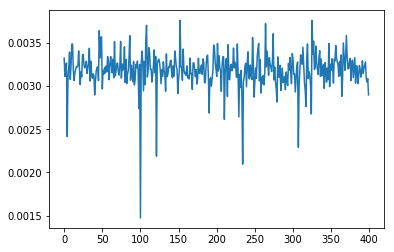

In [20]:
plt.plot(squared_error)

Text(0, 0.5, 'log g')

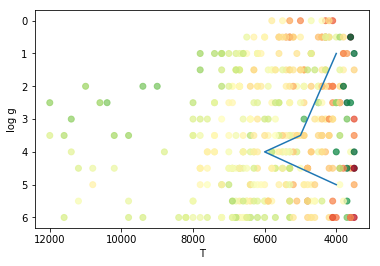

In [22]:
plt.scatter(T_effs, log_gs,
            c=squared_error, cmap=plt.cm.RdYlGn_r, 
            norm=colors.Normalize(vmin=0.003188-2*.00029, vmax=.003188+2*.00029, clip=False), alpha=.75)

plt.plot([4000, 6000, 5000, 4000], [5, 4, 3.5, 1])

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel("T")
plt.ylabel("log g")

In [24]:
print(np.mean(tetra_error), np.var(tetra_error))

0.0027102191459671982 9.525811556133044e-08


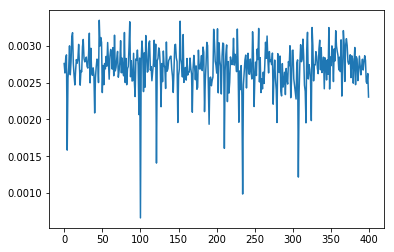

In [25]:
plt.plot(tetra_error)

Text(0, 0.5, 'log g')

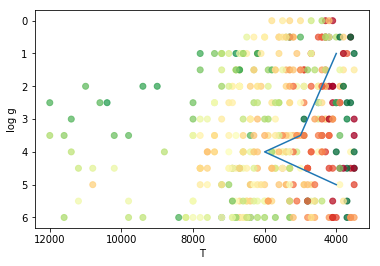

In [27]:
plt.scatter(T_effs, log_gs,
            c=tetra_error, cmap=plt.cm.RdYlGn_r, 
            norm=colors.Normalize(vmin=0.0027-2*.00026, vmax=0.0027+2*.00026, clip=False), alpha=.75)

plt.plot([4000, 6000, 5000, 4000], [5, 4, 3.5, 1])

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel("T")
plt.ylabel("log g")

In [7]:
vae.close()

NameError: name 'vae' is not defined